In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
boston = pd.read_csv("HousingData.csv")
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
X = boston.iloc[:, [5,7]]
X

,RM,DIS
0,6.575,4.0900
1,6.421,4.9671
2,7.185,4.9671
3,6.998,6.0622
4,7.147,6.0622
...,...,...
501,6.593,2.4786
502,6.120,2.2875
503,6.976,2.1675
504,6.794,2.3889


In [6]:
type(X)

pandas.core.frame.DataFrame

In [4]:
y = boston.iloc[:, 13]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [5]:
type(y)

pandas.core.series.Series

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Text(0.5, 0, 'RM, DIS')

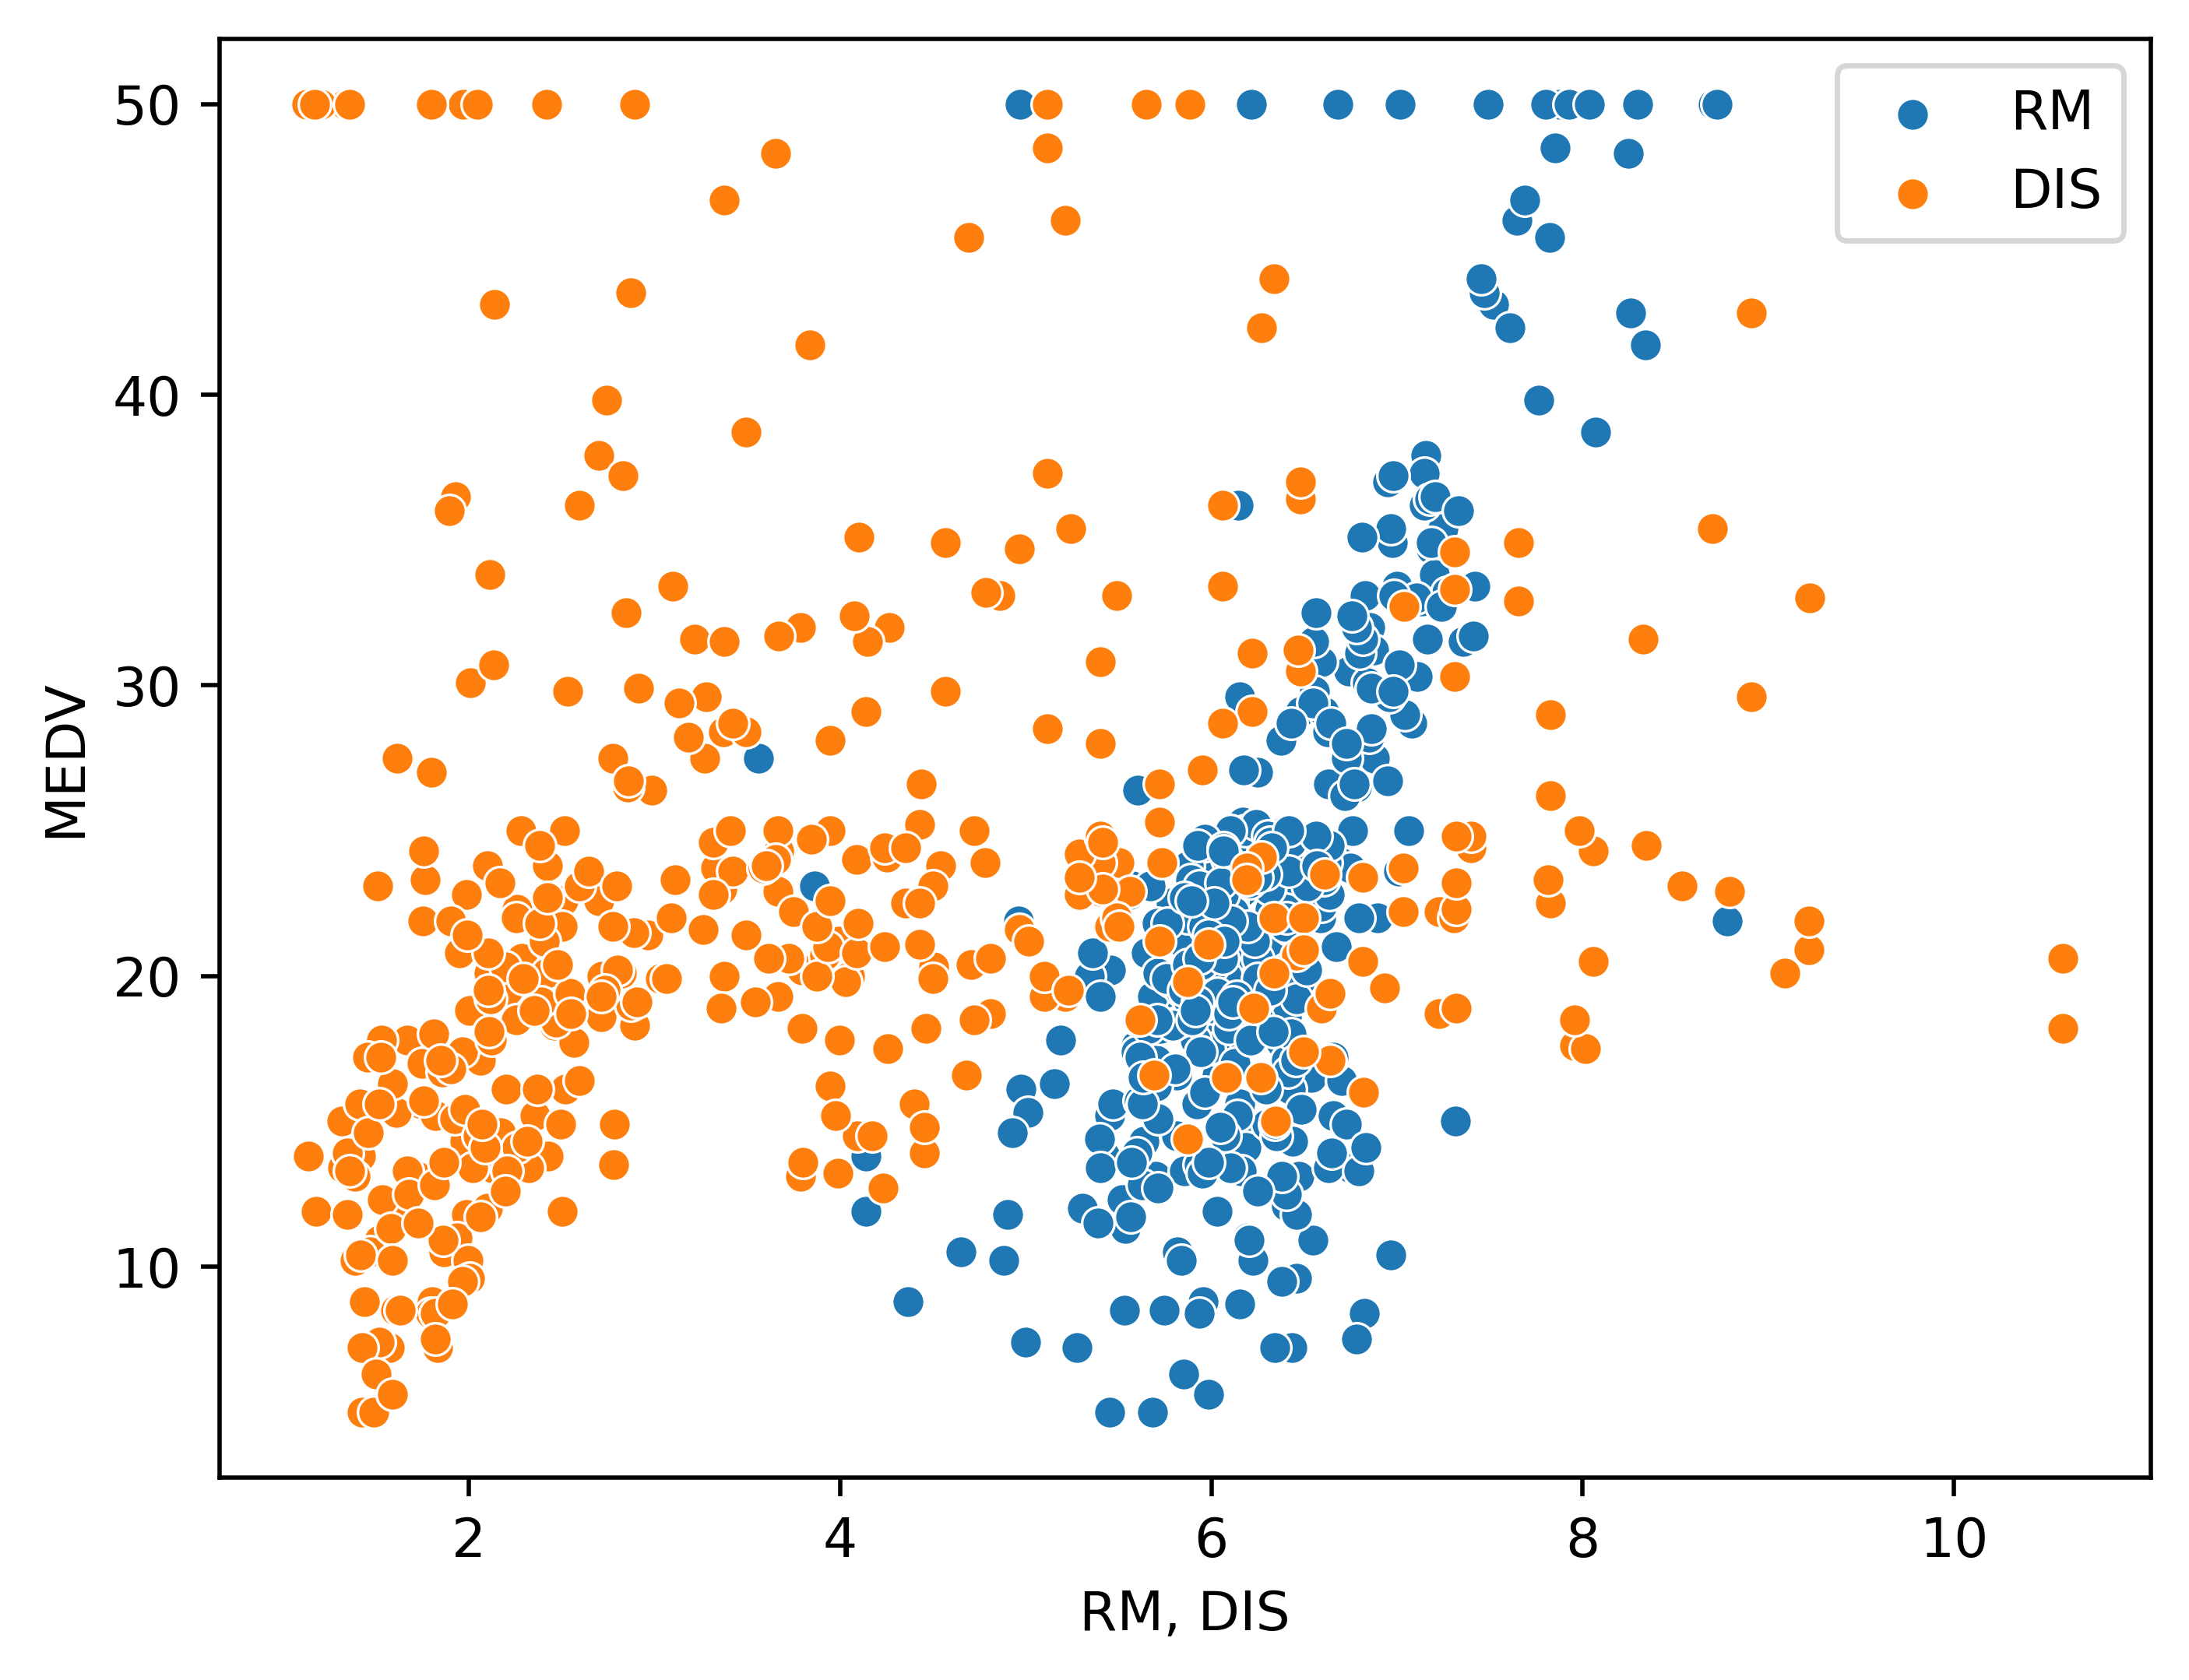

In [45]:
plt.figure(1).dpi = 500
sns.scatterplot(x = X_train.RM, y = y_train)
sns.scatterplot(x = X_train.DIS, y = y_train)
plt.legend(["RM", "DIS"])
plt.xlabel("RM, DIS")

In [46]:
y_train_predict = reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("Train RMSE =", rmse)
print("Train R2 score =", r2)

Train RMSE = 6.880661815711827
Train R2 score = 0.44886412767814


In [47]:
y_test_predict = reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
print("Test RMSE =", rmse)
print("Test R2 score =", r2)

Test RMSE = 4.90477373637417
Test R2 score = 0.6927370456571789
